In [2]:
import numpy as np
from datasets.feature_acoustic import extract_waveform_from_wav
from utils.speech_visualization import plot_waveform_use_torchaudio, plot_waveform,load_waveform_from_wav_use_torchaudio

# Female05 impro neu
wav_path1 = r"E:\Datasets\IEMOCAP\raw_unzip\Session5\sentences\wav\Ses05F_impro04\Ses05F_impro04_F040.wav"
# Female05 impro sad
wav_path2 = r"E:\Datasets\IEMOCAP\raw_unzip\Session5\sentences\wav\Ses05F_impro04\Ses05F_impro04_M016.wav"
# Female05 impro hap
wav_path3 = r"E:\Datasets\IEMOCAP\raw_unzip\Session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M028.wav"
# Female05 impro ang
wav_path4 = r"E:\Datasets\IEMOCAP\raw_unzip\Session5\sentences\wav\Ses05F_impro08\Ses05F_impro08_M005.wav"


In [3]:
waveform_use_torch, sr_use_torch = load_waveform_from_wav_use_torchaudio(wav_path2)
waveform_use_librosa = extract_waveform_from_wav(wav_path2, max_sequence_length=None)
waveform_use_torch.shape, waveform_use_librosa.shape



AttributeError: 'tuple' object has no attribute 'shape'

In [176]:
def waveform_split_by_ms(waveform, sample_rate, segment_length_ms=500, overlap=125):
    segment_size = int((segment_length_ms / 1000) * sample_rate)
    segment_shift = int((overlap / 1000) * sample_rate)

    segments_list = []

    for i in range(len(waveform) // segment_shift):
        if i * segment_shift + segment_size >= len(waveform):
            break
        segments_list.append(waveform[i * segment_shift:i * segment_shift + segment_size].unsqueeze(0))
    return segments_list,np.concatenate(seg_list, axis=0)


In [177]:
seg_list = waveform_split_by_ms(waveform_use_torch.squeeze(), sr_use_torch)

In [178]:
len(seg_list), seg_list[1].shape

(2, (46, 8000))

In [179]:
plot_waveform_use_torchaudio(seg_list[2], sr_use_torch, emotion='None')

IndexError: tuple index out of range

In [180]:
plot_waveform_use_torchaudio(seg_list[6], sr_use_torch, emotion='None')

IndexError: tuple index out of range

In [181]:
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
import torch

# num_clusters
K = 3


def get_the_K_nearest_item_dist_cluster_center(X, K):
    kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10, random_state=3407).fit(X)
    k_nearest_x_dist_center_list = []
    for center in kmeans.cluster_centers_:
        item = X[0]
        min_dist = np.Inf
        for x in X:
            if euclidean(center, x) < min_dist:
                item = x
                min_dist = euclidean(center, x)
        k_nearest_x_dist_center_list.append(item)

    return k_nearest_x_dist_center_list, kmeans.labels_

In [160]:
seg_array = np.concatenate(seg_list, axis=0)
seg_array.shape

k_nearest_x_dist_center_list, labels = get_the_K_nearest_item_dist_cluster_center(seg_array, K)

D:\Miniconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [161]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0])

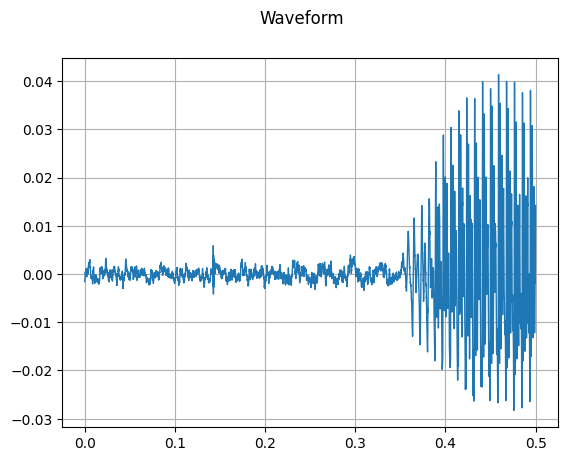

In [162]:
plot_waveform(torch.tensor(seg_array[3]).unsqueeze(0), sr_use_torch)

In [163]:
len(k_nearest_x_dist_center_list)

3

In [164]:
k_nearest_x_dist_center_list[1].shape

(8000,)

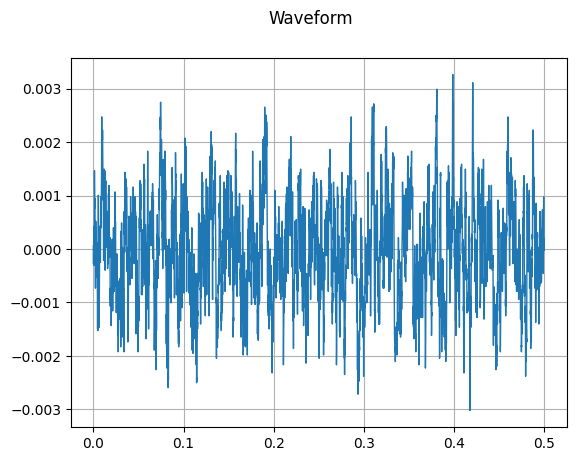

In [165]:
plot_waveform(torch.tensor(k_nearest_x_dist_center_list[0]).unsqueeze(0), sr_use_torch)

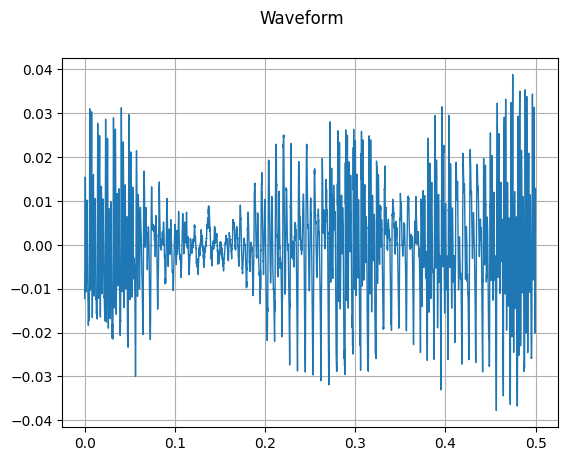

In [166]:
plot_waveform(torch.tensor(k_nearest_x_dist_center_list[1]).unsqueeze(0), sr_use_torch)


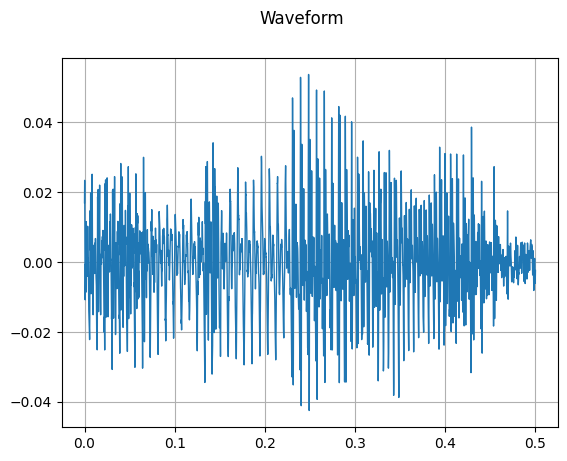

In [182]:
plot_waveform(torch.tensor(k_nearest_x_dist_center_list[2]).unsqueeze(0), sr_use_torch)

k_nearest_x_dist_center_list[1].shape

k_nearest_x_dist_center_waveform = np.concatenate(k_nearest_x_dist_center_list)

k_nearest_x_dist_center_waveform.shape


def k_key_segment_recombine_to_waveform(k_nearest_x_dist_center_list):
    return np.concatenate(k_nearest_x_dist_center_list)

In [183]:


X = torch.randn(1, 16000)

seg_list,to_cluster = waveform_split_by_ms(X,sample_rate=16000)
k_key_segments,_ = get_the_K_nearest_item_dist_cluster_center(to_cluster,K=3)
recombine_waveform = k_key_segment_recombine_to_waveform(k_key_segments)




<__array_function__ internals>:180: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)